In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Use this image:

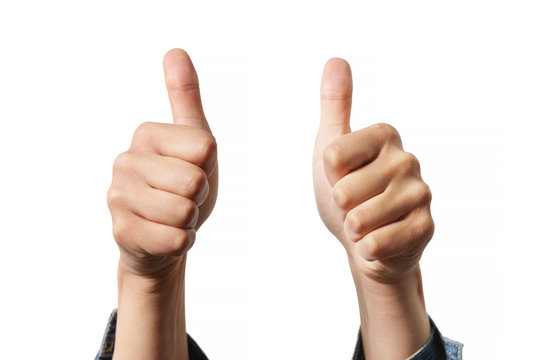

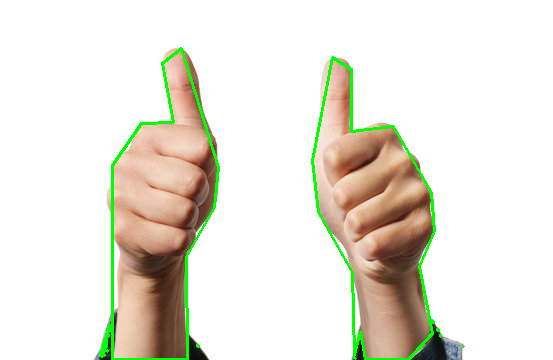

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read the input image and convert to HSV
img_dir = '/content/drive/My Drive/Colab Notebooks/Computer Vision/'
hands_img = cv2.imread(img_dir + 'hands.jpeg')
hsv_img = cv2.cvtColor(hands_img, cv2.COLOR_BGR2HSV)

# Define the range of skin color in HSV
lower_skin = np.array([0, 20, 70], dtype=np.uint8)
upper_skin = np.array([20, 255, 255], dtype=np.uint8)

# Threshold the HSV image (to get only skin colors)
skin_mask = cv2.inRange(hsv_img, lower_skin, upper_skin)

# Find contours
contours, _ = cv2.findContours(skin_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through the contours
for cnt in contours:
    # Approximate the contour with a polygon
    epsilon = 0.01 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    
    # Draw contours
    cv2.drawContours(hands_img, [approx], 0, (0, 255, 0), 2)

# Display the original image with the hand region highlighted
cv2_imshow(hands_img)